In [1]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib.colors import ListedColormap

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'    
    
# list of correct replies (out of 10 total)
lst = [4,5,5,3,3,7,6,3,6,6,6,4,4,5,5,3,5,6,2,3]
expert = [5,5,2,4,1,5,4,1,2,3,3,1,3,2,3,1,1,3,2,1]
  
# Calling DataFrame constructor on list
df = pd.DataFrame(list(zip(lst, expert)),
               columns =['Correct_Count', 'Expertise'])
#df = pd.DataFrame([lst,expert])
df

Correct_Count  Expertise
0               4          5
1               5          5
2               5          2
3               3          4
4               3          1
5               7          5
6               6          4
7               3          1
8               6          2
9               6          3
10              6          3
11              4          1
12              4          3
13              5          2
14              5          3
15              3          1
16              5          1
17              6          3
18              2          2
19              3          1

In [2]:
df.describe()

Correct_Count  Expertise
count      20.000000  20.000000
mean        4.550000   2.600000
std         1.394538   1.429022
min         2.000000   1.000000
25%         3.000000   1.000000
50%         5.000000   2.500000
75%         6.000000   3.250000
max         7.000000   5.000000

In [3]:
df.dtypes

Correct_Count    int64
Expertise        int64
dtype: object

In [4]:
df.Correct_Count[1]

5

In [9]:
ptot = 0
for i in range(0,20):
    pval = scipy.stats.binomtest(df.Correct_Count[i], n=10, p=0.5, alternative='two-sided')
    print(pval.pvalue)
    ptot +=pval.pvalue

print()
print(ptot/20)

0.75390625
1.0
1.0
0.34375
0.34375
0.34375
0.75390625
0.34375
0.75390625
0.75390625
0.75390625
0.75390625
0.75390625
1.0
1.0
0.34375
1.0
0.75390625
0.109375
0.34375

0.66015625


In [5]:
ptot = 0
for i in range(0,20):
    pval = scipy.stats.binomtest(df.Correct_Count[i], n=10, p=0.5, alternative='less')
    print(pval.pvalue)
    ptot +=pval.pvalue

print()
print(ptot/20)

0.376953125
0.623046875
0.623046875
0.171875
0.171875
0.9453125
0.828125
0.171875
0.828125
0.828125
0.828125
0.376953125
0.376953125
0.623046875
0.623046875
0.171875
0.623046875
0.828125
0.0546875
0.171875

0.5123046875


In [6]:
ptot = 0
for i in range(0,20):
    pval = scipy.stats.binomtest(df.Correct_Count[i], n=10, p=0.5, alternative='greater')
    print(pval.pvalue)
    ptot +=pval.pvalue

print()
print(ptot/20)

0.828125
0.623046875
0.623046875
0.9453125
0.9453125
0.171875
0.376953125
0.9453125
0.376953125
0.376953125
0.376953125
0.828125
0.828125
0.623046875
0.623046875
0.9453125
0.623046875
0.376953125
0.9892578125
0.9453125

0.668603515625


In [7]:
import seaborn as sns
sns.histplot(data=df, x="Correct_Count", palette="Dark2", element='step',)

/var/folders/s4/4_q5ztgx3tsd6d737tdcfpt80000gn/T/ipykernel_20802/583741562.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="Correct_Count", palette="Dark2", element='step',)


<AxesSubplot: xlabel='Correct_Count', ylabel='Count'>

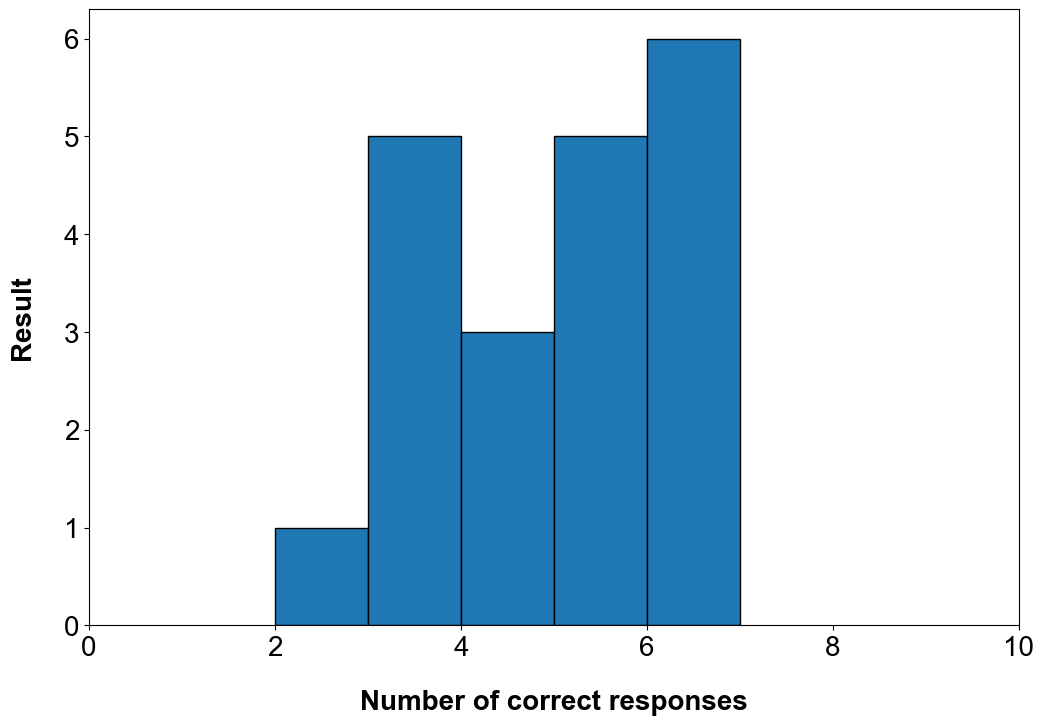

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(x=[df.Correct_Count],bins=5,edgecolor='black')

ax.grid=False
ax.color='#86bf91'
ax.set_xlim([0, 10])

ax.set_title("")
ax.set_xlabel("Number of correct responses", labelpad=20, weight='bold', size=20)
ax.set_ylabel("Result", labelpad=20, weight='bold', size=20)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

In [ ]:
sns.pairplot(df)

In [ ]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()